In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
from tensorflow.keras.datasets import fashion_mnist

In [52]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [53]:
#visualize data

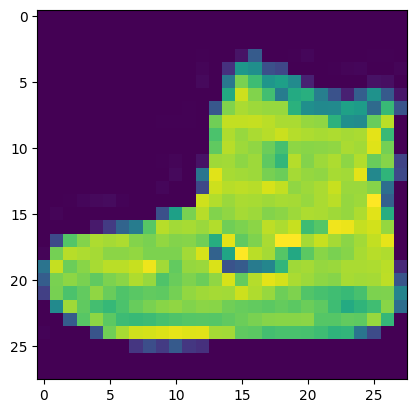

In [55]:
plt.imshow(x_train[0])

In [56]:
#preprocessing

In [57]:
x_train.max()

np.uint8(255)

In [58]:
x_train = x_train /255
x_test  = x_test /255

In [59]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [60]:
x_train.shape

(60000, 28, 28, 1)

In [61]:
x_test.shape

(10000, 28, 28, 1)

In [62]:
from tensorflow.keras.utils import to_categorical

In [63]:
y_cat_train =to_categorical(y_train,10)

In [64]:
y_cat_test = to_categorical(y_test,10)

In [117]:
model = Sequential()
model.add(InputLayer(shape=(28,28,1))) # Corrected: input_shape as a keyword argument
model.add(Conv2D(32, (4,4), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten()) # Instantiate Flatten layer
model.add(Dense(128, activation='relu')) # activation inside Dense constructor
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Corrected: Typo 'comiple' to 'compile'

In [118]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,866 (647.91 KB)

 Trainable params: 165,866 (647.91 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [120]:
model.fit(x_train,y_cat_train,epochs=20,
          validation_data=(x_test,y_cat_test),
          batch_size=32,
          callbacks=[early_stop])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.7663 - loss: 0.6510 - val_accuracy: 0.8620 - val_loss: 0.3758
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8788 - loss: 0.3311 - val_accuracy: 0.8830 - val_loss: 0.3206
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8993 - loss: 0.2752 - val_accuracy: 0.8937 - val_loss: 0.2933
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9110 - loss: 0.2402 - val_accuracy: 0.8926 - val_loss: 0.2893
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9181 - loss: 0.2179 - val_accuracy: 0.9025 - val_loss: 0.2774
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9276 - loss: 0.1923 - val_accuracy: 0.8978 - val_loss: 0.3040
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9349 - loss: 0.1709 - val_accuracy: 0.9027 - val_loss: 0.2886


In [121]:
metric = pd.DataFrame(model.history.history)

In [122]:
metric

,accuracy,loss,val_accuracy,val_loss
0,0.826233,0.477983,0.8620,0.375757
1,0.882633,0.318361,0.8830,0.320601
2,0.899950,0.272187,0.8937,0.293303
3,0.910517,0.241250,0.8926,0.289341
4,0.918050,0.216739,0.9025,0.277437
5,0.926933,0.194231,0.8978,0.304007
6,0.933033,0.175494,0.9027,0.288648


<Axes: >

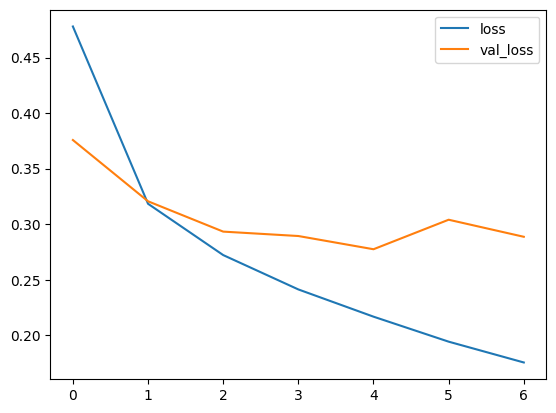

In [123]:
losses =metric[['loss','val_loss']]
losses.plot()

<Axes: >

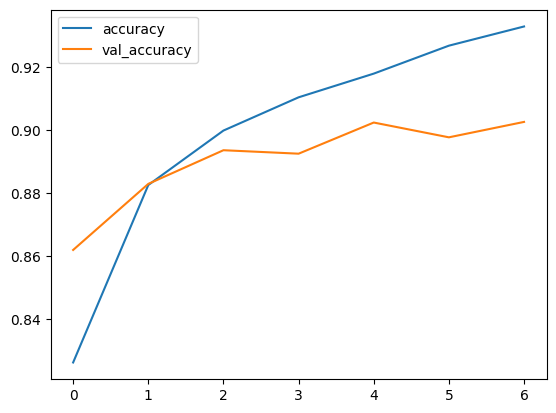

In [124]:
acc =metric[['accuracy','val_accuracy']]
acc.plot()

In [125]:
model.evaluate(x_train,y_cat_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9462 - loss: 0.1457


[0.1475958228111267, 0.9451500177383423]

In [126]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [127]:
from sklearn.metrics import confusion_matrix,classification_report

In [128]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.87      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.96      0.98      0.97      1000
           6       0.75      0.68      0.71      1000
           7       0.98      0.91      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [129]:
print(confusion_matrix(y_test,predicted_classes))

[[888   1  20  11   3   0  67   0  10   0]
 [  4 974   0  11   2   0   7   0   2   0]
 [ 19   0 874  10  42   0  55   0   0   0]
 [ 24   3  11 923  10   0  27   0   2   0]
 [  1   0  61  36 839   0  61   0   2   0]
 [  0   0   0   0   0 982   0   5   1  12]
 [153   0  61  18  72   0 681   0  15   0]
 [  0   0   0   0   0  31   0 907   0  62]
 [  4   0   1   2   3   0   6   1 981   2]
 [  0   0   0   0   0   5   1  16   0 978]]


<Axes: >

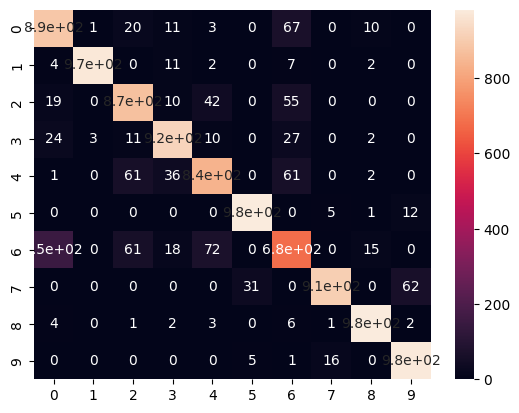

In [130]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True,)

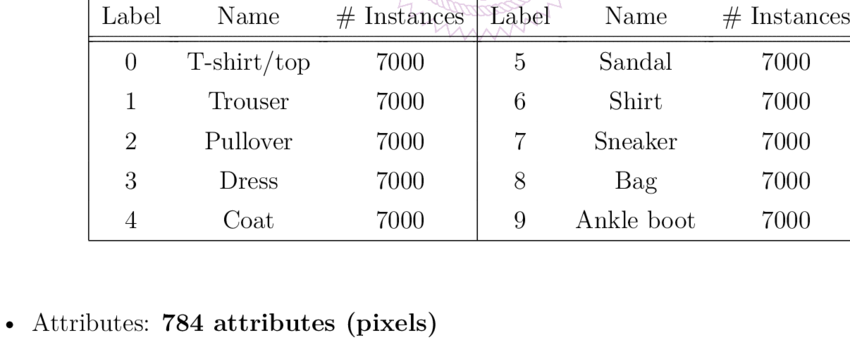

In [145]:
new_image = x_train[1]

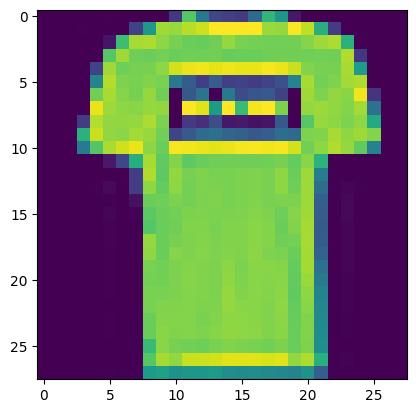

In [146]:
plt.imshow(new_image)

In [147]:
new_image_reshaped = np.expand_dims(new_image, axis=0)
result =model.predict(new_image_reshaped).argmax()

labels={
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'

}

for key, value in labels.items():
    if key == result:
        print('Seems Like a ',value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Seems Like a  T-shirt
